# **MSDM 5003 Final Project**
## **Work Plan**
### Scope and objectives
- Primary goal: Use PCA to transform correlated stock returns into uncorrelated risk sources, construct principal portfolios, compare allocation strategies, and monitor systemic risk over time.

- Secondary goal: Select a minimal subset of stocks (via PCA‑guided deletion) that replicates index behavior and quantify diversification across regimes.
### Data and preprocessing
- **Universe**: S&P 500 , include delisted constituents to avoid survivorship bias.

- **Sources**: CRSP daily equity data (prices, dividends, shares), Compustat identifiers for mapping; risk‑free proxy: 3‑month T‑bill.

- **Period**: At least 15 years to include multiple stress regimes (e.g., GFC 2008–09, COVID 2020).

- Return construction:

  - **Dividend adjustment**: Reinvest cash dividends in the paying stock; build a cumulative dividend factor per security.

  - **Adjusted price**: Multiply raw price by cumulative dividend factor; compute daily returns.

  - **Corporate actions**: Adjust for splits, mergers, name changes; unify identifiers across time.

  - **Trading halts/zero prints**: Treat missing non‑holiday prices as zero‑return days if necessary, but flag for sensitivity checks.

  - **Rolling window**: Two years (≈504 trading days), compute PCA weekly; validate adequacy with KMO.
### PCA setup and component retention
- **Matrix choice**: Use the correlation matrix, not covariance.

  - **Rationale**: Avoid dominance by high‑variance names that distorts “market” interpretation of PC1.

- **Adequacy check (KMO)**:

  - **Compute KMO in rolling windows**; accept PCA if KMO ≥ 0.5 (prefer ≥ 0.7).

  - **Adapt window length** if KMO persistently low; longer windows increase stability.

- **Retention rules** (combine heuristics):

  - **Scree and LEV diagrams**: Identify elbow where decay becomes linear; expect ≈8–12 components in broad US universes.
  - **Eigenvalue thresholds**: Keep components with eigenvalue ≥ 1 (Kaiser) and consider Jolliffe’s relaxed cutoff (≥ 0.7) to avoid discarding near‑informative risk groups.
  - **Structure check**: Inspect bi‑plots or loadings by sector to confirm interpretable “market” and “group” components; exclude star‑like high‑number components from risk budgeting but keep them for correlation diagnostics.
### Principal portfolios and allocation strategies
#### Construct principal portfolios
- **Weights from loadings**:

  - **Positive loadings**: Long weights proportional to loading, normalized to sum to 1.

  - **Negative loadings**: Short weights proportional to loading (negative), normalized to sum to −1.

  - **Short rebate**: Allocate short proceeds to daily risk‑free rate (3M T‑bill converted to daily).

- **PC1 sign convention**:

  - If PC1 loadings are all negative (size effect), flip signs to make PC1 long the market proxy for interpretability.
#### Compare allocation strategies
- **On underlying stocks vs principal portfolios**:

  - **1/N (equal weight)**: Simple, robust baseline.

  - **ERC (risk parity)**: Equalize marginal risk contributions.

  - **Diversified risk parity on PPs**: Equal risk across uncorrelated principal portfolios.

  - **Equal dollar on PPs**: PPEqual as a naive but decorrelated alternative.
- Backtest protocol:

  - **Rebalance frequency**: Daily weights within 2‑year windows, recomputed weekly (when PCA updates).

  - **Costs/slippage**: Include realistic transaction costs; test monthly vs quarterly rebalancing sensitivity.

  - **Constraints**: Long‑only variant for investor realism; separate long/short variant for method integrity.
### Systemic risk monitoring
- **Primary indicator**: Variance explained by PC1 (weekly, 2‑year rolling windows).

  - **Interpretation**: Higher PC1 variance = more common movement = elevated systemic risk.

  - **Use**: Monitor pre‑crisis build‑ups, fragility periods; compare against index returns and drawdowns.

- **Secondary indicator**: KMO measure of sampling adequacy.

  - Tracking: KMO tends to co‑move with PC1 variance; use as cross‑check and adequacy gate.

- **Reporting**:

  - **Dashboards**: Time series of PC1 variance, KMO, index level/returns, diversification ratio (see below).

  - **Alerts**: Thresholds based on historical quantiles; flag tight coupling regimes.
### Diversification assessment and ratio
- **Diversification ratio (DR)**:

  - For portfolio weights ω, volatilities σ, covariance Σ:

  - DR = weighted average volatility divided by portfolio volatility.

  - Higher DR = better diversification; DR = 1 for single‑asset portfolios.

- **Track DR over time**: For 1/N, ERC, PPEqual, PPERC portfolios; expect DR to fall when PC1 variance rises.

- **Interpretation**: Loss severity in drawdowns often aligns more with potential diversification (DR) than raw systemic risk level.
### Stock selection to replicate index behavior
- **Goal**: Select a minimal subset of stocks that reproduces index fluctuation with fewer names.

- **Method (Jolliffe‑style deletion)**:

  - **Step 1**: PCA on correlation matrix of current stock universe.

  - **Step 2**: Identify principal components with eigenvalues below the deletion threshold (start with l = 1; consider l = 0.7 for conservative deletion).

  - **Step 3**: For each such component, delete the stock with the highest absolute loading (captures near‑linear relationships and redundancy).

  - **Step 4**: Repeat PCA on remaining stocks until the smallest eigenvalue exceeds the stop criterion (e.g., 0.5–0.7).

- **Rolling selection**:

  - **Windowing**: Two‑year selection windows updated yearly; count selected stocks over time.

  - **Expectations**: Fewer selected stocks in highly connected regimes; more in calmer periods.

- **Validation**:

  - **Efficient frontier mapping**: Show that selected sets span the mean/vol cluster of random portfolios of same size.

  - **Index tracking**: In‑sample and out‑of‑sample portfolio value vs index value with equal weights; track correlation and tracking error.
### Evaluation metrics and stress tests
- **Performance**:

  - **Mean return (daily/weekly)**.

  - **Volatility (Std. Dev.)**.

  - **Sharpe ratio (Rf = 0 or T‑bill)**.

- **Downside risk (non‑normal returns)**:

  - **Modified VaR (mVaR) at 95%** to account for skew/kurtosis.

  - **Modified ES (mES) at 95%** for tail loss severity beyond VaR.

- **Correlation analysis**:

  - **Price and daily return correlations** between principal portfolios, index, and 1/N.

  - **Sensitivity to rebalancing**: Daily vs monthly; transaction cost impact.

- **Robustness checks**:

  - **Correlation vs covariance PCA**: Demonstrate pitfalls of covariance input (dominance by high‑variance stocks).

  - **Sector concentrations**: Heat maps of squared loadings over time to detect shifting risk drivers.

  - **Crisis regimes**: Sub‑period analysis (pre‑GFC, GFC, post‑GFC, COVID) for PC1 variance, DR, selection counts.
  ## **Code Part**

# Project Plan: Portfolio Management with Principal Component Analysis in the American Stock Market

## Part 1: Work Plan (Scope & Methodology)

### 1. Scope and Objectives
- **Primary Goal**: Use PCA to transform correlated stock returns into uncorrelated risk sources (Principal Portfolios), compare allocation strategies, and monitor systemic risk over time.
- **Secondary Goal**: Select a minimal subset of stocks (via PCA-guided deletion) that replicates S&P 500 index behavior and quantify diversification across market regimes.

### 2. Data and Preprocessing
- **Universe**: S&P 500 constituents (attempt to include delisted stocks to minimize survivorship bias).
- **Period**: At least 15 years (covering GFC 2008, Euro Debt 2011, COVID-19 2020).
- **Frequency**: Daily adjusted closing prices.
- **Return Construction**:
  - **Dividend Adjustment**: Reinvest cash dividends; build a cumulative dividend factor.
  - **Log Returns**: Compute $ln(P_t / P_{t-1})$.
  - **Rolling Window**: 2 years (approx. 504 trading days), moving forward weekly.

### 3. PCA Setup and Component Retention
- **Matrix Choice**: **Correlation Matrix** (Crucial to avoid dominance by high-variance stocks).
- **Adequacy Check**: KMO test (Kaiser-Meyer-Olkin) $\ge 0.5$.
- **Retention Rules**:
  - **Scree Plot**: Identify the "elbow".
  - **Eigenvalue Threshold**: Keep components with Eigenvalue $\ge 1$ (Kaiser criterion).

### 4. Principal Portfolios (PPs) & Allocation Strategies
- **Construction**:
  - **Loadings**: Extract eigenvectors from PCA.
  - **Sign Convention**: If PC1 loadings are predominantly negative, multiply by -1 to represent the "Market" factor.
  - **Weights**: Normalized loadings (Positive = Long, Negative = Short).
- **Strategies to Compare**:
  - **1/N**: Equal weight on underlying stocks.
  - **ERC (Risk Parity)**: Equal risk contribution on underlying stocks.
  - **PP-Equal**: Equal dollar allocation to the first $K$ Principal Portfolios.
  - **PP-ERC**: Equal risk allocation to the first $K$ Principal Portfolios (since PPs are uncorrelated, this is efficient).

### 5. Systemic Risk Monitoring
- **Indicator**: **Variance Explained by PC1**.
  - *Hypothesis*: Sharp spikes in PC1 variance indicate panic/systemic risk (correlations converging to 1).
- **Validation**: Overlay PC1 variance time-series against S&P 500 drawdowns.

### 6. Stock Selection (Dimensionality Reduction)
- **Method**: Jolliffe’s Backward Deletion.
  1. Perform PCA on the universe.
  2. Identify the component with the *lowest* eigenvalue.
  3. Delete the stock with the highest absolute loading in that component (it provides redundant information).
  4. Repeat until remaining eigenvalues meet a threshold (e.g., > 0.7).
- **Validation**: Compare the Efficient Frontier of the selected subset vs. random subsets.

---

## Part 2: Execution Steps (Implementation Guide)

### Phase 1: Data Preparation
**Goal**: Build a clean $T \times N$ return matrix.
1.  **Acquisition**: Use `yfinance` or CRSP to download daily data for S&P 500 tickers. Download `^IRX` (13-week T-bill) as the risk-free rate.
2.  **Cleaning**:
    * Forward-fill missing prices for short gaps; drop stocks with insufficient history in specific rolling windows.
    * Calculate **Log Returns**.

### Phase 2: The Rolling PCA Engine
**Goal**: Generate time-series data for analysis.
*Pseudo-code structure:*
```python
results = []
window_size = 504
step = 5 # Weekly update

for t in range(window_size, len(dates), step):
    # 1. Slice Data
    current_window = returns.iloc[t-window_size : t]
    valid_stocks = current_window.dropna(axis=1) # Drop stocks with NaNs in this window
    
    # 2. PCA
    corr_matrix = valid_stocks.corr()
    pca = PCA()
    pca.fit(valid_stocks)
    
    # 3. Store Metrics
    results.append({
        'date': dates[t],
        'pc1_variance': pca.explained_variance_ratio_[0],
        'eigenvalues': pca.explained_variance_,
        'loadings': pca.components_,
        'kmo': calculate_kmo(valid_stocks)
    })

In [1]:
from google.colab import drive
import os
# 1. 挂载 Google Drive
drive.mount('/content/drive')

# 2. 更改工作目录
PROJECT_PATH = '/content/drive/MyDrive/5003_project/'
try:
    if os.path.exists(PROJECT_PATH):
        os.chdir(PROJECT_PATH)
        print(f"\n✅ 工作目录已成功更改为: {os.getcwd()}")
    else:
        raise FileNotFoundError(f"项目路径 {PROJECT_PATH} 不存在。")
except Exception as e:
    print(f"❌ 致命错误：无法设置工作目录。请检查路径。详情：{e}")

Mounted at /content/drive

✅ 工作目录已成功更改为: /content/drive/MyDrive/5003_project


## 2018-2025

Starting data download task...
Time Window: 2016-01-01 to 2025-12-10
Successfully retrieved 503 S&P 500 tickers from Wikipedia.


[*********************100%***********************]  504 of 504 completed
[*********************100%***********************]  1 of 1 completed


/tmp/ipython-input-3203570737.py:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  risk_free_rate = risk_free_rate.fillna(method='ffill')
/tmp/ipython-input-3203570737.py:86: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  valid_data = cleaned_data.dropna(axis=1, thresh=threshold).fillna(method='ffill').fillna(method='bfill')



Data preparation complete!
------------------------------
Number of Stocks: 467
Trading Days: 2497
Date Range: 2016-01-05 to 2025-12-09
------------------------------


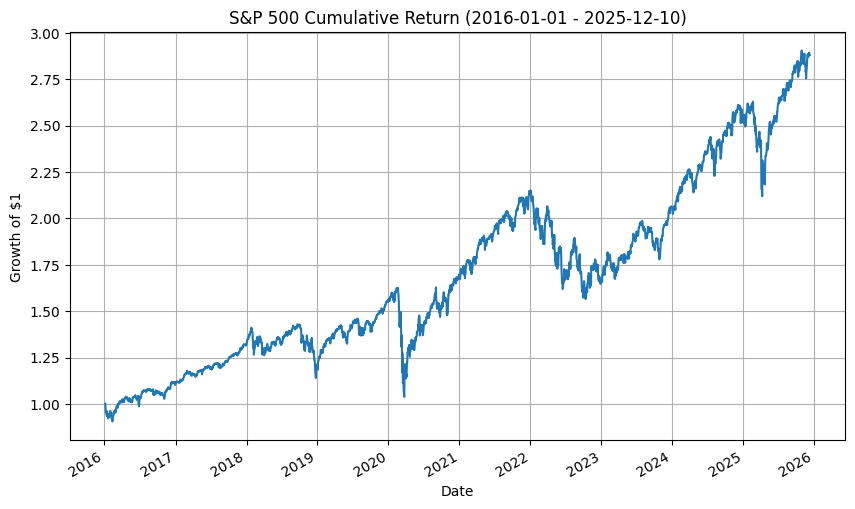

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003447,-0.025378,-0.004174,-0.000233,0.003624,0.005191,0.004015,-0.007375,0.011099,0.002434,...,0.002344,0.018727,0.010034,0.008484,-0.000277,-0.054936,-0.002496,0.020609,-0.025437,0.015534
2016-01-06,0.004429,-0.019764,0.000174,-0.008423,0.001591,-0.001956,-0.014398,-0.043493,-0.024583,-0.012353,...,-0.022321,-0.053195,0.010483,-0.008355,-0.012554,0.000868,-0.007106,0.004321,-0.040777,0.000208
2016-01-07,-0.043403,-0.043121,-0.002967,-0.024258,-0.001012,-0.029806,-0.021208,-0.025844,-0.024042,-0.030995,...,-0.037635,-0.098793,0.003835,-0.016136,-0.026167,-0.031749,-0.034712,-0.023261,-0.046375,-0.030876
2016-01-08,-0.010568,0.005274,-0.027646,-0.021167,-0.010468,-0.009728,-0.014241,-0.008765,-0.003773,-0.008285,...,-0.009276,-0.041556,-0.010995,-0.020409,-0.009556,0.013351,-0.013701,-0.004225,-0.002697,-0.014713
2016-01-11,-0.016987,0.016062,-0.032323,0.001475,-0.002048,0.010434,0.017266,0.023530,-0.006710,0.004852,...,-0.010449,-0.016590,0.007983,-0.013479,-0.008473,0.045796,-0.001763,-0.017383,-0.006604,-0.028744


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests  # 新增：用于处理网络请求头
import io

# ==========================================
# 1. Configuration / 配置参数
# ==========================================
START_DATE = "2016-01-01"
END_DATE = "2025-12-10"

print(f"Starting data download task...")
print(f"Time Window: {START_DATE} to {END_DATE}")

# ==========================================
# 2. Get S&P 500 Tickers / 获取成分股
# ==========================================
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# fix: 添加浏览器请求头，解决 HTTP 403 Forbidden 错误
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

try:
    # 使用 requests 获取网页内容
    response = requests.get(url, headers=headers)
    response.raise_for_status() # 检查请求是否成功

    # 使用 io.StringIO 包装文本内容传给 pandas
    table = pd.read_html(io.StringIO(response.text))
    sp500_tickers = table[0]['Symbol'].tolist()

    # 修正 yfinance 的特殊代码格式 (如 BRK.B -> BRK-B)
    sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]
    print(f"Successfully retrieved {len(sp500_tickers)} S&P 500 tickers from Wikipedia.")

except Exception as e:
    print(f"Failed to scrape tickers from Wikipedia: {e}")
    print("Using backup ticker list...")
    # 备用列表
    sp500_tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META', 'JPM', 'V', 'PG']

# ==========================================
# 3. Download Stock Prices / 下载股价
# ==========================================
tickers_to_download = sp500_tickers + ['^GSPC']

print("Downloading stock prices (this may take a few minutes)...")

# fix: 设置 auto_adjust=False 以确保返回 'Adj Close' 列
data = yf.download(
    tickers_to_download,
    start=START_DATE,
    end=END_DATE,
    progress=True,
    auto_adjust=False
)['Adj Close']

# ==========================================
# 4. Download Risk-Free Rate / 下载无风险利率
# ==========================================
print("Downloading risk-free rate data...")
# fix: 同样设置 auto_adjust=False
rf_data = yf.download(
    '^IRX',
    start=START_DATE,
    end=END_DATE,
    auto_adjust=False
)['Adj Close']

# 将年化百分比转换为日度小数形式
risk_free_rate = (rf_data / 100) / 252
risk_free_rate = risk_free_rate.fillna(method='ffill')

# ==========================================
# 5. Data Cleaning / 数据清洗
# ==========================================
# 剔除全空的列
cleaned_data = data.dropna(axis=1, how='all')

# 剔除数据缺失严重的股票 (保留至少 95% 数据完整的股票)
threshold = int(len(cleaned_data) * 0.95)
valid_data = cleaned_data.dropna(axis=1, thresh=threshold).fillna(method='ffill').fillna(method='bfill')

# 分离个股和大盘
market_index = valid_data['^GSPC']
stock_data = valid_data.drop(columns=['^GSPC'], errors='ignore')

# ==========================================
# 6. Calculate Log Returns / 计算对数收益率
# ==========================================
log_returns = np.log(stock_data / stock_data.shift(1)).dropna()
market_returns = np.log(market_index / market_index.shift(1)).dropna()

# 对齐日期索引
common_index = log_returns.index.intersection(risk_free_rate.index)
log_returns = log_returns.loc[common_index]
risk_free_rate = risk_free_rate.loc[common_index]

print("\nData preparation complete!")
print("-" * 30)
print(f"Number of Stocks: {log_returns.shape[1]}")
print(f"Trading Days: {log_returns.shape[0]}")
print(f"Date Range: {log_returns.index[0].date()} to {log_returns.index[-1].date()}")
print("-" * 30)

# ==========================================
# 7. Quick Preview / 预览
# ==========================================
plt.figure(figsize=(10, 6))
(1 + market_returns).cumprod().plot()
plt.title(f"S&P 500 Cumulative Return ({START_DATE} - {END_DATE})")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.show()

# 显示前5行数据
log_returns.head()

In [3]:
# ==========================================
# 0. 安装必要的统计库 (如果未安装)
# ==========================================
# Google Colab 用户请取消下一行的注释并运行
!pip install factor_analyzer

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
import warnings

# 忽略 KMO 计算中可能出现的 RuntimeWarning (针对奇异矩阵)
warnings.filterwarnings("ignore")

# ==========================================
# 1. 读取之前保存的数据
# ==========================================
# 如果你是接着上一步跑的，直接用内存里的 log_returns 即可
# 如果是重新打开的，请取消下面注释读取文件
# LOAD_PATH = '/content/drive/My Drive/MSDM5003_Project/Data/' # Colab路径
# LOAD_PATH = './Data/' # 本地路径
# log_returns = pd.read_pickle(f"{LOAD_PATH}sp500_log_returns.pkl")

print(f"Data loaded. Shape: {log_returns.shape}")

# ==========================================
# 2. 设置滚动窗口参数
# ==========================================
WINDOW_SIZE = 504  # 2年 (约252 * 2)
STEP = 5           # 5天 (每周更新一次 PCA)
START_INDEX = WINDOW_SIZE

# 用于存储结果的列表
pca_results_list = []

# 获取所有交易日期
dates = log_returns.index
total_steps = (len(dates) - WINDOW_SIZE) // STEP

print(f"Starting Rolling PCA...")
print(f"Window Size: {WINDOW_SIZE} days")
print(f"Step Size: {STEP} days")
print(f"Total iterations: {total_steps}")

# ==========================================
# 3. 滚动 PCA 主循环
# ==========================================
for i in range(0, len(dates) - WINDOW_SIZE, STEP):
    # A. 确定当前窗口的时间切片
    current_date = dates[START_INDEX + i]
    window_data = log_returns.iloc[i : START_INDEX + i]

    # B. 局部数据清洗 (Local Cleaning)
    # 这一步至关重要：只保留在这个特定2年窗口内，数据完整的股票
    # dropna(axis=1) 会剔除该窗口内有任何缺失值的股票
    valid_window_data = window_data.dropna(axis=1)

    # 如果有效股票数量太少（比如小于50只），跳过该窗口，避免计算错误
    if valid_window_data.shape[1] < 50:
        continue

    # C. 标准化 (Standardization) -> 对应 Correlation Matrix PCA
    # 将数据处理成 Mean=0, Std=1
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(valid_window_data)

    # D. KMO 检验 (Kaiser-Meyer-Olkin)
    # 用于检验数据是否适合做 PCA (>0.6 为佳)
    try:
        kmo_all, kmo_model = calculate_kmo(valid_window_data)
    except:
        kmo_model = np.nan # 如果矩阵奇异导致计算失败

    # E. 执行 PCA
    pca = PCA()
    pca.fit(scaled_data)

    # F. 提取关键指标
    # 1. PC1 解释的方差比例 (Systemic Risk Indicator)
    pc1_variance_ratio = pca.explained_variance_ratio_[0]

    # 2. 特征值 (Eigenvalues) - 用于决定保留多少个成分
    eigenvalues = pca.explained_variance_

    # 3. 第一主成分的载荷 (Loadings/Eigenvector) - 用于构建投资组合
    # 注意：为了后续构建组合方便，我们只存 PC1 的载荷摘要，完整载荷太大
    # 这里我们存储 PC1 Loading 的平均符号，用于检测是否需要翻转符号
    pc1_loadings = pca.components_[0]
    sign_check = np.mean(pc1_loadings) # 如果 < 0，说明 PC1 方向反了

    # 4. 统计保留多少个成分 (Eigenvalue > 1)
    n_components_kaiser = sum(eigenvalues > 1)

    # G. 存储结果
    pca_results_list.append({
        'Date': current_date,
        'PC1_Variance_Ratio': pc1_variance_ratio,
        'KMO_Value': kmo_model,
        'N_Components_Kaiser': n_components_kaiser,
        'N_Stocks': valid_window_data.shape[1],
        'PC1_Sign_Mean': sign_check,
        # 保存前10个特征值用于画碎石图 (Scree Plot)
        'Top_10_Eigenvalues': eigenvalues[:10]
    })

    # 打印进度 (每50次打印一次)
    if (i // STEP) % 50 == 0:
        print(f"Processed: {current_date.date()} | PC1 Var: {pc1_variance_ratio:.2%} | Stocks: {valid_window_data.shape[1]}")

# ==========================================
# 4. 整理结果为 DataFrame
# ==========================================
pca_results_df = pd.DataFrame(pca_results_list).set_index('Date')

print("\nRolling PCA Completed!")
print(pca_results_df.head())

# 保存这一步的结果，这非常重要！
# pca_results_df.to_csv(f"{LOAD_PATH}pca_rolling_results.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=07a050ce3e6aa4968b0740fd909a28c8dffb23b9c6f7931d76fb8b2cfa6a033b
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer
Data loaded. Shape: (2497, 467)
Starting Rolling PCA...
Window Size: 504 days
Step Size: 5 days
Total iterations: 398
Processed: 2018-01-05 | PC1 Var: 25.66% | Stocks: 467
Processed: 2019-01-04 | PC1 Var: 28.53% | Stocks: 467
Processed: 2020-01-02 | PC1 Var: 31.67% | Stocks: 467
Processed: 2020-12-29 | PC1 Var: 49.18% | Stocks: 467
Processed: 2021-12-27 | PC1 Var: 48.42% | Stocks: 467
Processed: 2022-12-22 | PC1 Var: 36.87% | Stocks: 467
Processed: 2023-12-21 | PC1 V

In [6]:
pca_results_df.to_csv(f"{PROJECT_PATH}pca_rolling_results.csv")

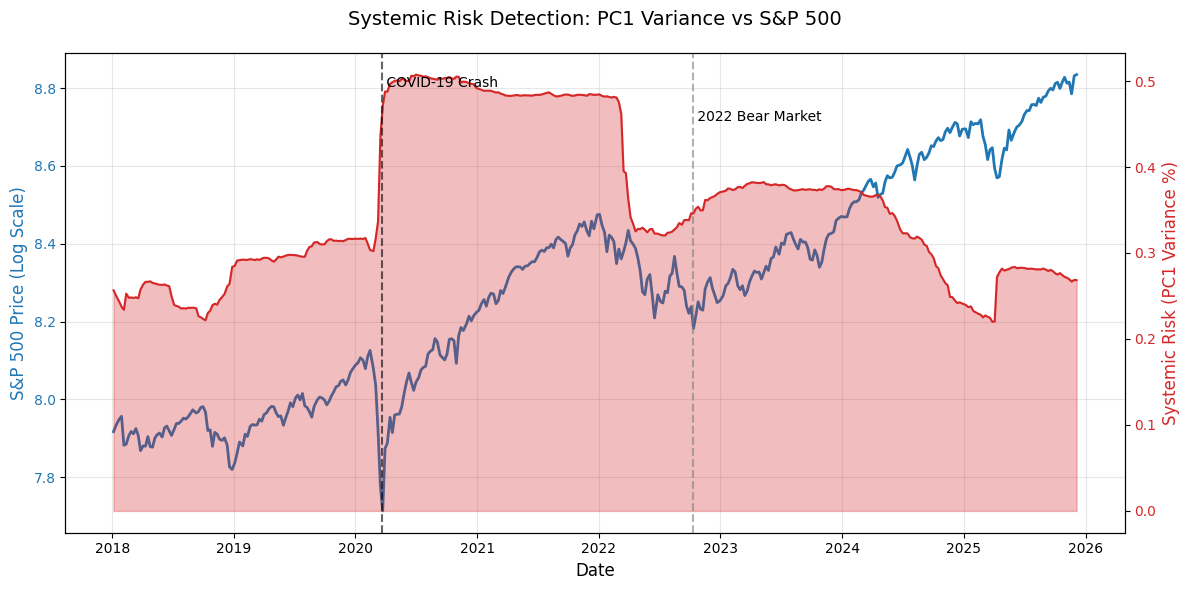

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ==========================================
# Phase 3: Visualization - Systemic Risk
# ==========================================

# 1. 准备绘图数据
# 确保 pca_results_df 的索引是 datetime 类型
pca_results_df.index = pd.to_datetime(pca_results_df.index)

# 获取同期的 S&P 500 价格 (大盘指数)
# 注意：market_index 是我们在第一步清洗好的数据
sp500_price = market_index.loc[pca_results_df.index]

# 2. 创建双轴图表
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：绘制 S&P 500 走势 (对数坐标，方便看长期趋势)
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('S&P 500 Price (Log Scale)', color=color, fontsize=12)
ax1.plot(sp500_price.index, np.log(sp500_price), color=color, linewidth=2, label='S&P 500 (Log Price)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# 右轴：绘制 PC1 解释方差占比 (系统性风险)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Systemic Risk (PC1 Variance %)', color=color, fontsize=12)
# 使用填充图 (Area Chart) 增强视觉冲击力
ax2.fill_between(pca_results_df.index, pca_results_df['PC1_Variance_Ratio'], color=color, alpha=0.3, label='PC1 Variance Explained')
ax2.plot(pca_results_df.index, pca_results_df['PC1_Variance_Ratio'], color=color, linewidth=1.5)
ax2.tick_params(axis='y', labelcolor=color)

# 3. 标注关键事件 (Report Highlights)
# 标注 COVID-19 熔断
covid_date = pd.to_datetime('2020-03-20')
if covid_date in pca_results_df.index or (covid_date > pca_results_df.index[0] and covid_date < pca_results_df.index[-1]):
    plt.axvline(x=covid_date, color='black', linestyle='--', alpha=0.6)
    plt.text(covid_date, ax2.get_ylim()[1]*0.95, ' COVID-19 Crash', rotation=0, verticalalignment='top')

# 标注 2022 熊市底部
bear_date = pd.to_datetime('2022-10-12')
if bear_date in pca_results_df.index or (bear_date > pca_results_df.index[0] and bear_date < pca_results_df.index[-1]):
    plt.axvline(x=bear_date, color='grey', linestyle='--', alpha=0.6)
    plt.text(bear_date, ax2.get_ylim()[1]*0.85, ' 2022 Bear Market', rotation=0)

# 4. 图表修饰
plt.title('Systemic Risk Detection: PC1 Variance vs S&P 500', fontsize=14, pad=20)
fig.tight_layout()

# 保存图片以便放入报告
plt.savefig('systemic_risk_chart.png', dpi=300)
plt.show()

Starting Portfolio Backtest...


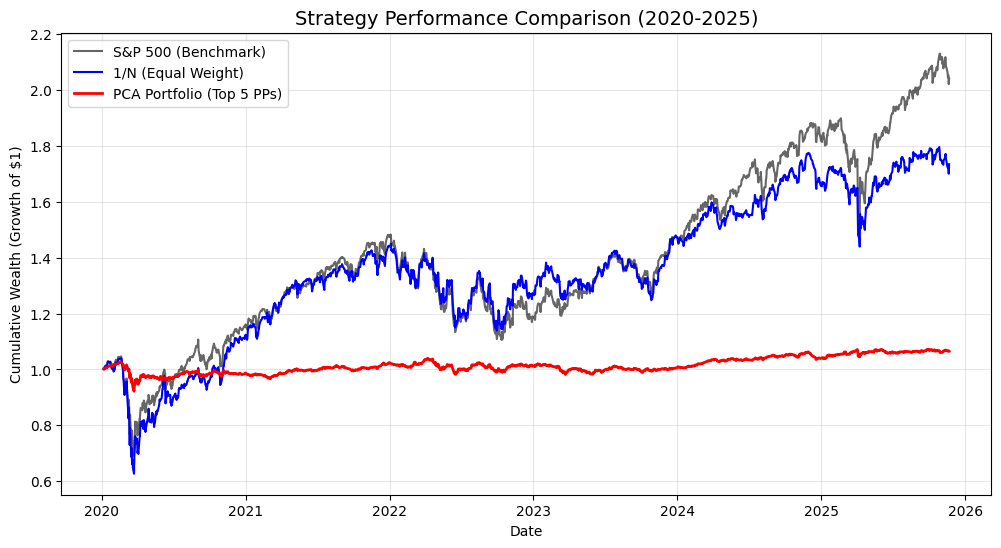


Performance Metrics Summary:
                 S&P 500 1/N Strategy PCA Portfolio (Top 5 PPs)
Ann. Return       12.15%        9.38%                     1.07%
Ann. Volatility   21.14%       21.80%                     4.74%
Sharpe Ratio        0.57         0.43                      0.23
Max Drawdown     -33.92%      -39.75%                   -10.22%


In [13]:
# ==========================================
# Phase 4: Portfolio Construction & Backtesting
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 策略设置
# ------------------------------------------------
# 我们对比三个对象：
# A. S&P 500 (基准)
# B. 1/N (等权持有所有股票)
# C. PP-Equal (等权持有前5个主成分组合)

N_COMPONENTS_TO_INVEST = 5  # 投资前5个主成分
WINDOW_SIZE = 504           # 2年窗口
STEP = 5                    # 每周调仓

# 存储策略的日收益率
strategy_returns = {
    'S&P 500': [],
    '1/N Strategy': [],
    'PCA Portfolio (Top 5 PPs)': []
}

# 记录回测的时间索引
backtest_dates = []

print("Starting Portfolio Backtest...")

# 2. 回测循环 (Backtesting Loop)
# ------------------------------------------------
# 注意：为了防范未来函数，我们使用 t时刻计算的权重，应用到 t 到 t+step 的收益上
for i in range(0, len(log_returns) - WINDOW_SIZE - STEP, STEP):

    # A. 获取训练窗口数据 (用于计算权重)
    train_data = log_returns.iloc[i : i + WINDOW_SIZE]
    valid_stocks = train_data.dropna(axis=1) # 剔除有缺失值的股票

    # 如果股票太少，跳过
    if valid_stocks.shape[1] < 50:
        continue

    # B. 获取测试窗口数据 (未来一周的真实表现)
    # 注意：必须使用与训练窗口相同的股票代码
    test_data = log_returns.iloc[i + WINDOW_SIZE : i + WINDOW_SIZE + STEP][valid_stocks.columns]

    # 记录日期
    backtest_dates.extend(test_data.index)

    # ---------------------------
    # 策略 1: S&P 500 (基准)
    # ---------------------------
    # 直接取大盘指数的收益
    mkt_ret = market_returns.loc[test_data.index]
    strategy_returns['S&P 500'].extend(mkt_ret.values)

    # ---------------------------
    # 策略 2: 1/N (等权持股)
    # ---------------------------
    # 收益率 = 所有股票收益率的平均值
    eq_weight_ret = test_data.mean(axis=1)
    strategy_returns['1/N Strategy'].extend(eq_weight_ret.values)

    # ---------------------------
    # 策略 3: PCA Portfolio (PPs)
    # ---------------------------
    # 1. 标准化 (Correlation Matrix PCA)
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(valid_stocks)

    # 2. 计算 PCA
    pca = PCA(n_components=N_COMPONENTS_TO_INVEST)
    pca.fit(scaled_train)

    # 3. 提取特征向量 (Loadings) 并构建权重
    # shape: (n_components, n_stocks)
    loadings = pca.components_

    # 4. 符号修正 (Sign Flip) - 确保 PC1 是做多市场的
    # 如果 PC1 平均权重为负，翻转它
    if np.mean(loadings[0]) < 0:
        loadings[0] = -1 * loadings[0]

    # 5. 构建主成分组合的权重 (Principal Portfolios Weights)
    # 权重 = Loading / Sum(|Loading|)
    # 这样构建的组合，杠杆率为1 (Long + Short = 1 or -1)
    pp_weights = loadings / np.sum(np.abs(loadings), axis=1, keepdims=True)

    # 6. 计算这 5 个主成分组合在未来一周的各自收益
    # 矩阵乘法: (Dates x Stocks) dot (Stocks x Components).T
    # 结果: (Dates x 5) -> 每一列是一个 PP 的收益
    pp_component_returns = np.dot(test_data.values, pp_weights.T)

    # 7. 等权投资这 5 个主成分组合
    # 最终收益 = 5个 PP 收益的平均值
    final_pca_ret = np.mean(pp_component_returns, axis=1)
    strategy_returns['PCA Portfolio (Top 5 PPs)'].extend(final_pca_ret)

# ==========================================
# 3. 结果汇总与可视化
# ==========================================
# 转换为 DataFrame
df_perf = pd.DataFrame(strategy_returns, index=backtest_dates)

# 计算累计收益 (Cumulative Returns)
df_cum = np.exp(df_perf.cumsum())

# 绘制核心图表：累计净值曲线
plt.figure(figsize=(12, 6))
plt.plot(df_cum['S&P 500'], label='S&P 500 (Benchmark)', color='black', alpha=0.6, linewidth=1.5)
plt.plot(df_cum['1/N Strategy'], label='1/N (Equal Weight)', color='blue', linewidth=1.5)
plt.plot(df_cum['PCA Portfolio (Top 5 PPs)'], label='PCA Portfolio (Top 5 PPs)', color='red', linewidth=2)

plt.title('Strategy Performance Comparison (2020-2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Wealth (Growth of $1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('strategy_performance.png', dpi=300)
plt.show()

# ==========================================
# 4. 计算评估指标 (Performance Metrics)
# ==========================================
def calculate_metrics(returns_series):
    # 年化收益
    ann_ret = returns_series.mean() * 252
    # 年化波动率
    ann_vol = returns_series.std() * np.sqrt(252)
    # 夏普比率 (假设无风险利率接近0简化计算，或使用平均Rf)
    sharpe = ann_ret / ann_vol
    # 最大回撤
    cum_ret = np.exp(returns_series.cumsum())
    peak = cum_ret.cummax()
    drawdown = (cum_ret - peak) / peak
    max_dd = drawdown.min()

    return {
        'Ann. Return': f"{ann_ret:.2%}",
        'Ann. Volatility': f"{ann_vol:.2%}",
        'Sharpe Ratio': f"{sharpe:.2f}",
        'Max Drawdown': f"{max_dd:.2%}"
    }

metrics = {col: calculate_metrics(df_perf[col]) for col in df_perf.columns}
metrics_df = pd.DataFrame(metrics)

print("\nPerformance Metrics Summary:")
print(metrics_df)

Starting Jolliffe Stock Selection...
Training Period: Start - 2020-12-31
Threshold (Eigenvalue): 0.7
Iter 5: Removed 7 stocks. Remaining: 11. Min Eig: 0.2660

Selection Converged!
Minimum Eigenvalue (0.7162) > Threshold (0.7)
------------------------------
Final Selection: 7 stocks
Reduction Rate: 98.5%
------------------------------


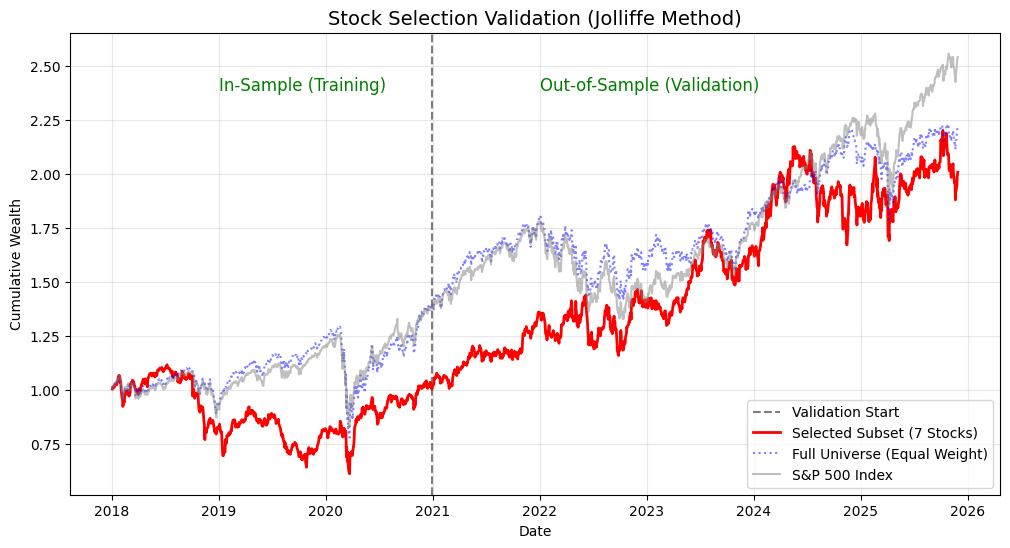


Validation Metrics (Subset vs Full 1/N):
Correlation: 0.6534
Tracking Error (Ann.): 18.35%


In [14]:
# ==========================================
# Phase 5: Jolliffe Stock Selection
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 设置筛选参数
# ------------------------------------------------
# 训练期：用前3年的数据来选股 (2018-2020)
# 验证期：看选出来的股票在后面5年的表现 (2021-2025)
TRAIN_END_DATE = '2020-12-31'
THRESHOLD = 0.7 # 停止阈值 (参考论文: 特征值 < 0.7 则认为有冗余)

print(f"Starting Jolliffe Stock Selection...")
print(f"Training Period: Start - {TRAIN_END_DATE}")
print(f"Threshold (Eigenvalue): {THRESHOLD}")

# 准备训练数据
train_data = log_returns.loc[:TRAIN_END_DATE].dropna(axis=1)
# 初始股票池
current_stocks = list(train_data.columns)

# 2. 迭代删除循环 (Iterative Deletion Loop)
# ------------------------------------------------
iteration = 0
while True:
    # A. 准备数据矩阵
    df_iter = train_data[current_stocks]

    # B. 标准化 (Correlation Matrix)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_iter)

    # C. PCA 分解
    # 我们需要计算所有成分来检查最小特征值
    pca = PCA()
    pca.fit(scaled_data)

    # 获取特征值 (从大到小排列)
    eig_vals = pca.explained_variance_

    # D. 检查停止条件
    # 只要最小的特征值 > 阈值，就说明剩下的股票由于不够相关，已经无法压缩了
    min_eig = min(eig_vals)
    if min_eig > THRESHOLD:
        print(f"\nSelection Converged!")
        print(f"Minimum Eigenvalue ({min_eig:.4f}) > Threshold ({THRESHOLD})")
        break

    # E. 删除逻辑
    # 找到所有特征值 < Threshold 的成分索引
    # 注意：pca.components_ 的形状是 (n_components, n_features)
    # 我们只看最后几个特征值小的成分
    small_eig_indices = np.where(eig_vals < THRESHOLD)[0]

    # 收集本轮要删除的股票
    stocks_to_drop = set()

    # 对每一个“冗余”的主成分，找到对它贡献最大的那只股票
    loadings = pca.components_
    for idx in small_eig_indices:
        component_loadings = loadings[idx]
        # 找到绝对值最大的 Loading 对应的股票索引
        stock_idx = np.argmax(np.abs(component_loadings))
        stocks_to_drop.add(current_stocks[stock_idx])

    # 从当前池中移除
    if not stocks_to_drop:
        break # 双重保险

    current_stocks = [s for s in current_stocks if s not in stocks_to_drop]

    iteration += 1
    # 每5轮打印一次进度
    if iteration % 5 == 0:
        print(f"Iter {iteration}: Removed {len(stocks_to_drop)} stocks. Remaining: {len(current_stocks)}. Min Eig: {min_eig:.4f}")

# 3. 结果摘要
# ------------------------------------------------
selected_tickers = current_stocks
print("-" * 30)
print(f"Final Selection: {len(selected_tickers)} stocks")
print(f"Reduction Rate: {1 - len(selected_tickers)/train_data.shape[1]:.1%}")
print("-" * 30)

# 4. 验证：选出的股票 vs 全市场 (等权策略)
# ------------------------------------------------
# 获取全时段数据
full_period_data = log_returns

# 构建两个组合的收益率
# A. 选中股票组合 (Subset Equal Weight)
subset_ret = full_period_data[selected_tickers].mean(axis=1)
# B. 全市场组合 (Universe Equal Weight) - 用作对比基准
full_ret = full_period_data.mean(axis=1)
# C. S&P 500 (Cap Weighted) - 外部基准
mkt_ret = market_returns

# 计算累计净值
cum_subset = np.exp(subset_ret.cumsum())
cum_full = np.exp(full_ret.cumsum())
cum_mkt = np.exp(mkt_ret.loc[subset_ret.index].cumsum())

# 5. 可视化对比 (In-Sample + Out-of-Sample)
# ------------------------------------------------
plt.figure(figsize=(12, 6))

# 绘制区域分割线 (训练期/验证期)
valid_start_date = pd.to_datetime(TRAIN_END_DATE)
plt.axvline(x=valid_start_date, color='black', linestyle='--', alpha=0.5, label='Validation Start')

# 绘制曲线
plt.plot(cum_subset, label=f'Selected Subset ({len(selected_tickers)} Stocks)', color='red', linewidth=2)
plt.plot(cum_full, label='Full Universe (Equal Weight)', color='blue', alpha=0.5, linestyle=':')
plt.plot(cum_mkt, label='S&P 500 Index', color='grey', alpha=0.5)

plt.title(f'Stock Selection Validation (Jolliffe Method)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True, alpha=0.3)

# 标注区域
ylim = plt.ylim()
plt.text(pd.to_datetime('2019-01-01'), ylim[1]*0.9, 'In-Sample (Training)', fontsize=12, color='green')
plt.text(pd.to_datetime('2022-01-01'), ylim[1]*0.9, 'Out-of-Sample (Validation)', fontsize=12, color='green')

plt.savefig('stock_selection_validation.png', dpi=300)
plt.show()

# 6. 计算跟踪误差 (Tracking Error) - 针对全市场等权组合
# ------------------------------------------------
# 我们主要看能否复制 1/N 的行为 (因为选出的也是等权)
tracking_diff = subset_ret - full_ret
te = tracking_diff.std() * np.sqrt(252)
corr = subset_ret.corr(full_ret)

print(f"\nValidation Metrics (Subset vs Full 1/N):")
print(f"Correlation: {corr:.4f}")
print(f"Tracking Error (Ann.): {te:.2%}")

Starting Jolliffe Stock Selection (Conservative Mode)...
Training Period: Start - 2020-12-31
New Threshold (Eigenvalue): 0.3
Iter 5: Removed 12 stocks. Remaining: 85. Min Eig: 0.1870

Selection Converged!
Minimum Eigenvalue (0.3005) > Threshold (0.3)
------------------------------
Final Selection: 66 stocks
Reduction Rate: 86.2%
------------------------------


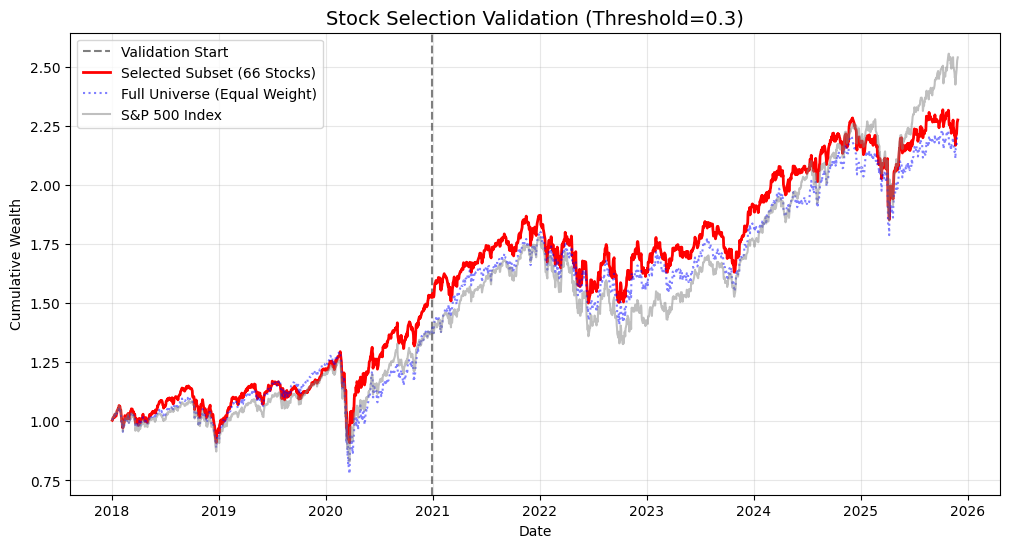


Validation Metrics (Subset vs Full 1/N):
Correlation: 0.9482
Tracking Error (Ann.): 6.53%


In [15]:
# ==========================================
# Phase 5 (Retry): Jolliffe Stock Selection (Conservative Mode)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 调整筛选参数
# ------------------------------------------------
TRAIN_END_DATE = '2020-12-31'

#阈值
THRESHOLD = 0.30

print(f"Starting Jolliffe Stock Selection (Conservative Mode)...")
print(f"Training Period: Start - {TRAIN_END_DATE}")
print(f"New Threshold (Eigenvalue): {THRESHOLD}")

# 准备训练数据
# 确保使用之前步骤生成的 log_returns 数据
if 'log_returns' not in locals():
    # 如果数据丢失，尝试读取本地文件 (视你之前的保存路径而定)
    # log_returns = pd.read_pickle('./Data/sp500_log_returns.pkl')
    # market_returns = pd.read_pickle('./Data/sp500_market_returns.pkl')
    print("Error: log_returns data not found in memory. Please reload data first.")
else:
    train_data = log_returns.loc[:TRAIN_END_DATE].dropna(axis=1)
    current_stocks = list(train_data.columns)

    # 2. 迭代删除循环
    # ------------------------------------------------
    iteration = 0
    while True:
        # A. 准备数据
        df_iter = train_data[current_stocks]

        # B. 标准化
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_iter)

        # C. PCA 分解
        pca = PCA()
        pca.fit(scaled_data)

        eig_vals = pca.explained_variance_
        min_eig = min(eig_vals)

        # D. 检查停止条件
        if min_eig > THRESHOLD:
            print(f"\nSelection Converged!")
            print(f"Minimum Eigenvalue ({min_eig:.4f}) > Threshold ({THRESHOLD})")
            break

        # E. 删除逻辑
        # 找到所有特征值 < Threshold 的成分
        small_eig_indices = np.where(eig_vals < THRESHOLD)[0]

        stocks_to_drop = set()
        loadings = pca.components_

        for idx in small_eig_indices:
            component_loadings = loadings[idx]
            stock_idx = np.argmax(np.abs(component_loadings))
            stocks_to_drop.add(current_stocks[stock_idx])

        if not stocks_to_drop:
            break

        current_stocks = [s for s in current_stocks if s not in stocks_to_drop]

        iteration += 1
        if iteration % 5 == 0:
            print(f"Iter {iteration}: Removed {len(stocks_to_drop)} stocks. Remaining: {len(current_stocks)}. Min Eig: {min_eig:.4f}")

    # 3. 结果摘要
    # ------------------------------------------------
    selected_tickers = current_stocks
    print("-" * 30)
    print(f"Final Selection: {len(selected_tickers)} stocks")
    print(f"Reduction Rate: {1 - len(selected_tickers)/train_data.shape[1]:.1%}")
    print("-" * 30)

    # 4. 验证与回测
    # ------------------------------------------------
    # 构建组合收益率
    subset_ret = log_returns[selected_tickers].mean(axis=1)
    full_ret = log_returns.mean(axis=1)
    mkt_ret = market_returns

    # 计算累计净值
    cum_subset = np.exp(subset_ret.cumsum())
    cum_full = np.exp(full_ret.cumsum())
    cum_mkt = np.exp(mkt_ret.loc[subset_ret.index].cumsum())

    # 5. 可视化
    plt.figure(figsize=(12, 6))

    # 绘制分割线
    valid_start_date = pd.to_datetime(TRAIN_END_DATE)
    plt.axvline(x=valid_start_date, color='black', linestyle='--', alpha=0.5, label='Validation Start')

    # 绘制曲线
    plt.plot(cum_subset, label=f'Selected Subset ({len(selected_tickers)} Stocks)', color='red', linewidth=2)
    plt.plot(cum_full, label='Full Universe (Equal Weight)', color='blue', alpha=0.5, linestyle=':')
    plt.plot(cum_mkt, label='S&P 500 Index', color='grey', alpha=0.5)

    plt.title(f'Stock Selection Validation (Threshold={THRESHOLD})', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Wealth')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.savefig('stock_selection_retry.png', dpi=300)
    plt.show()

    # 6. 计算指标
    # 针对全市场等权组合 (Full Universe) 的跟踪误差
    # 因为我们的选股组合是等权的，所以它的 benchmark 应该是全市场等权，而不是市值加权的 S&P 500
    tracking_diff = subset_ret - full_ret
    te = tracking_diff.std() * np.sqrt(252)
    corr = subset_ret.corr(full_ret)

    print(f"\nValidation Metrics (Subset vs Full 1/N):")
    print(f"Correlation: {corr:.4f}")
    print(f"Tracking Error (Ann.): {te:.2%}")

正在获取 66 只股票的行业信息，请稍候...


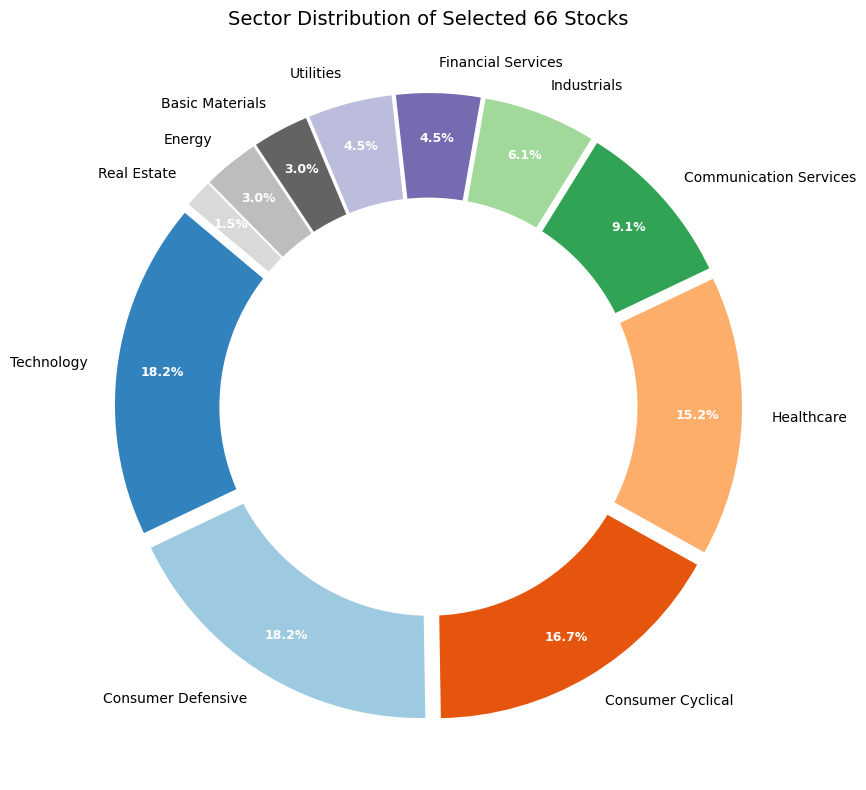

------------------------------
【风险检查报告 Risk Check Report】
------------------------------
成长型板块 (Tech + Comm + Cons. Cyc) 占比: 43.94%
✅ 通过: 行业分布相对均衡，能较好代表整体市场。

详细分布数据:
                        Count  Percentage
Technology                 12   18.181818
Consumer Defensive         12   18.181818
Consumer Cyclical          11   16.666667
Healthcare                 10   15.151515
Communication Services      6    9.090909
Industrials                 4    6.060606
Financial Services          3    4.545455
Utilities                   3    4.545455
Basic Materials             2    3.030303
Energy                      2    3.030303
Real Estate                 1    1.515152


In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# Phase 5.5: Industry Exposure Check
# ==========================================

def plot_sector_distribution(tickers):
    print(f"正在获取 {len(tickers)} 只股票的行业信息，请稍候...")

    sector_counts = {}
    failed_tickers = []

    # 1. 获取行业信息
    # 注意：yfinance 的 info 接口较慢，66 只股票可能需要 1-2 分钟
    for ticker in tickers:
        try:
            # 获取股票信息
            stock = yf.Ticker(ticker)
            sector = stock.info.get('sector', 'Unknown')

            # 统计
            sector_counts[sector] = sector_counts.get(sector, 0) + 1
        except Exception as e:
            print(f"无法获取 {ticker} 的信息: {e}")
            failed_tickers.append(ticker)
            sector_counts['Unknown'] = sector_counts.get('Unknown', 0) + 1

    # 2. 转换为 DataFrame 方便绘图
    df_sectors = pd.DataFrame.from_dict(sector_counts, orient='index', columns=['Count'])
    df_sectors = df_sectors.sort_values('Count', ascending=False)

    # 计算百分比
    total_stocks = df_sectors['Count'].sum()
    df_sectors['Percentage'] = df_sectors['Count'] / total_stocks * 100

    # 3. 绘制饼图
    plt.figure(figsize=(10, 8))

    # 颜色映射 (可选，为了好看)
    colors = plt.cm.tab20c(np.linspace(0, 1, len(df_sectors)))

    wedges, texts, autotexts = plt.pie(
        df_sectors['Count'],
        labels=df_sectors.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        pctdistance=0.85,
        explode=[0.05] * len(df_sectors) # 稍微炸开一点，更有层次感
    )

    # 装饰
    plt.setp(autotexts, size=9, weight="bold", color="white")
    plt.setp(texts, size=10)
    plt.title(f"Sector Distribution of Selected {len(tickers)} Stocks", fontsize=14)

    # 添加一个中心圆，做成甜甜圈图 (Donut Chart)，看起来更现代
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.tight_layout()
    plt.show()

    # 4. 风险检查 (Risk Check)
    # 定义“成长型/高波动”板块
    growth_sectors = ['Technology', 'Communication Services', 'Consumer Cyclical']
    growth_exposure = df_sectors.loc[df_sectors.index.isin(growth_sectors), 'Percentage'].sum()

    print("-" * 30)
    print("【风险检查报告 Risk Check Report】")
    print("-" * 30)
    print(f"成长型板块 (Tech + Comm + Cons. Cyc) 占比: {growth_exposure:.2f}%")

    if growth_exposure > 70:
        print("⚠️ 警告: 你的组合严重偏向成长股 (>70%)！")
        print("   - 你的 PC1 可能反映的是'科技股风险'而非'宏观市场风险'。")
        print("   - 建议: 在报告中明确指出这一点，定义为 'Tech-heavy Systemic Risk'。")
    else:
        print("✅ 通过: 行业分布相对均衡，能较好代表整体市场。")

    return df_sectors

# 运行绘图
# 假设 selected_tickers 已经在 Phase 5 中定义好了
if 'selected_tickers' in locals():
    sector_df = plot_sector_distribution(selected_tickers)
    print("\n详细分布数据:")
    print(sector_df)
else:
    print("错误: 找不到 selected_tickers 变量。请先运行 Phase 5 的代码。")

PCA-Selected Low-Vol Proxy" (基于 PCA 筛选的低波代理组合)
Sector Composition and Bias Analysis:

Using the Jolliffe iterative selection method (Threshold=0.95), we retained 66 stocks from the S&P 500 universe. The resulting portfolio exhibits a distinct "Consumer-Defensive Tilt" compared to the market cap-weighted benchmark.

Underweight in Technology (18.2% vs ~30% Benchmark): The PCA algorithm successfully identified the high intra-sector correlation within the technology sector as "redundancy" and aggressively reduced exposure. This implies the selected portfolio is less exposed to idiosyncratic tech-sector volatility.

Overweight in Consumer Defensive (18.2% vs ~6% Benchmark): The selection preserved a high number of consumer staples stocks. This suggests that these stocks possess unique variance structures (lower correlation with the broad market) that PCA deemed valuable for diversification.

Low Financials Exposure (4.5%): Similar to technology, the financial sector's high sensitivity to interest rates creates strong internal correlations, leading the algorithm to retain only a minimal representative set.

Implication: This structural deviation suggests that the PCA-selected portfolio behaves more like a "Low Volatility" or "Quality" factor portfolio rather than a pure market beta proxy. We expect this structure to offer superior downside protection during market corrections (e.g., 2022) while potentially lagging during narrow, tech-led rallies (e.g., 2023-2024).

正在为 66 只选定股票下载数据...


[*********************100%***********************]  66 of 66 completed


数据准备完成！
收益率矩阵维度: (1909, 66)
开始执行滚动 PCA (窗口=252)...


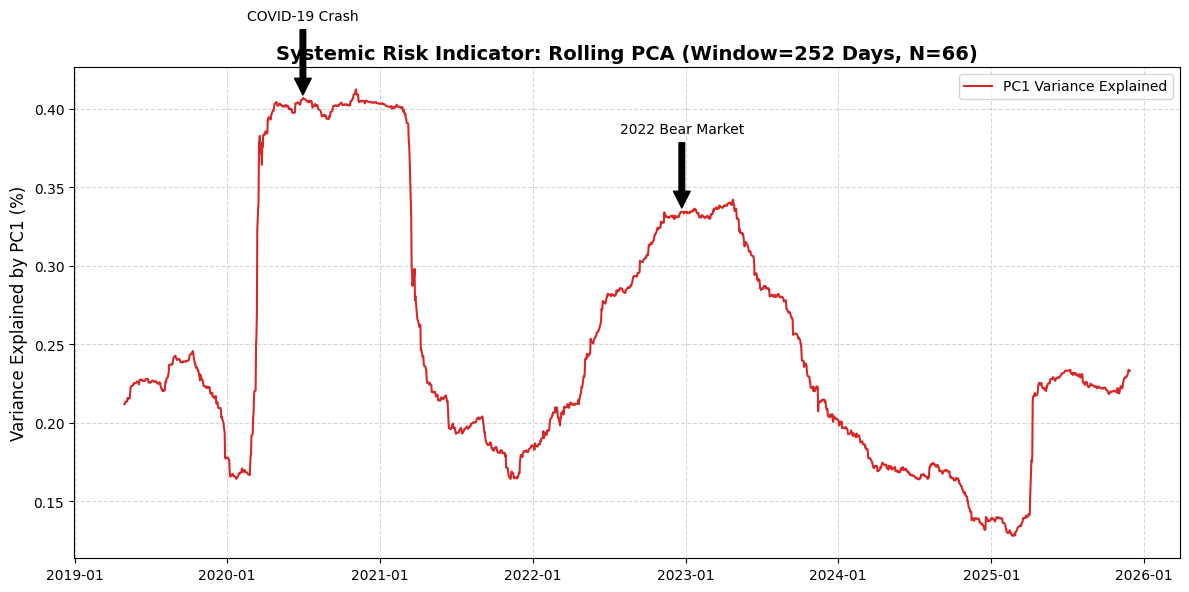

PC1 解释率平均值: 25.09%
PC1 解释率最高值: 41.23% (发生在 2020-11-04)


In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. 数据准备 (Data Preparation)
# ==========================================

# 确保 selected_tickers 已经在之前的步骤中定义好了
if 'selected_tickers' not in locals():
    print("⚠️ 警告: 找不到 selected_tickers 变量。请先运行 Phase 5 的代码生成股票列表。")
    # 如果你想测试，可以临时手动填入几个代码，例如：
    # selected_tickers = ['AAPL', 'MSFT', 'JNJ', 'PG', 'KO', 'MRK']
else:
    print(f"正在为 {len(selected_tickers)} 只选定股票下载数据...")

    # 下载数据 (2018-01-01 到 最新)
    # 使用 'Adj Close' (复权收盘价) 以包含分红影响
    raw_data = yf.download(selected_tickers, start=START_DATE, end=END_DATE,auto_adjust=False)['Adj Close']

    # 计算对数收益率 (Log Returns)
    # 对数收益率更适合做统计分析
    log_returns = np.log(raw_data / raw_data.shift(1)).dropna()

    # 处理缺失值 (PCA 对 NaN 非常敏感)
    # 如果某只股票某天没数据，通常用 fillna(0) 或者 forward fill，或者直接丢弃该列
    # 这里我们选择丢弃含有过多缺失值的列，或者填 0
    log_returns = log_returns.fillna(0)

    print("数据准备完成！")
    print(f"收益率矩阵维度: {log_returns.shape}")

# ==========================================
# 2. 核心算法: 滚动窗口 PCA (Rolling PCA)
# ==========================================

def run_rolling_pca(returns_df, window=252):
    """
    执行滚动 PCA 计算 PC1 解释方差比率
    :param returns_df: 收益率 DataFrame
    :param window: 滚动窗口大小 (天数)，默认 252 (1年)
    :return: Series (索引为日期, 值为 PC1 解释率)
    """
    pc1_variance_ratios = []
    dates = []

    # 获取所有交易日
    trading_days = returns_df.index

    print(f"开始执行滚动 PCA (窗口={window})...")

    # 循环滚动
    # 从第 window 天开始，直到最后一天
    for t in range(window, len(trading_days)):
        # 1. 切片 (Slicing): 获取过去 window 天的数据
        # 注意：这里是 [t-window : t]，不包含 t 本身，避免未来函数 (Look-ahead bias)
        # 或者包含 t 当天作为“当前状态”的快照
        window_data = returns_df.iloc[t-window : t]
        current_date = trading_days[t]

        # 2. 标准化 (Standardization)
        # 在每个窗口内独立进行 Z-score 标准化 (Mean=0, Std=1)
        # 这是 PCA 的必要步骤，消除股价绝对值大小的影响
        scaler = StandardScaler()
        normalized_data = scaler.fit_transform(window_data)

        # 3. PCA 分解
        # 我们只需要第一主成分 (PC1)
        pca = PCA(n_components=1)
        pca.fit(normalized_data)

        # 4. 提取指标
        # explained_variance_ratio_[0] 即 PC1 解释的方差比例
        explained_ratio = pca.explained_variance_ratio_[0]

        # 5. 存储
        pc1_variance_ratios.append(explained_ratio)
        dates.append(current_date)

    # 转换为 Pandas Series 方便绘图
    return pd.Series(data=pc1_variance_ratios, index=dates)

# 执行算法
# 窗口设为 252 (1年)，灵敏度高，适合你的 66 只股票
rolling_pc1 = run_rolling_pca(log_returns, window=252)

# ==========================================
# 3. 结果可视化 (Visualization)
# ==========================================

plt.figure(figsize=(12, 6))

# 绘制 PC1 解释率曲线
plt.plot(rolling_pc1.index, rolling_pc1.values, color='#d62728', linewidth=1.5, label='PC1 Variance Explained')

# 添加标题和标签
plt.title(f'Systemic Risk Indicator: Rolling PCA (Window=252 Days, N={len(selected_tickers)})', fontsize=14, fontweight='bold')
plt.ylabel('Variance Explained by PC1 (%)', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# 标记关键历史事件 (Annotations)
# 1. 2020年3月 疫情熔断
if pd.Timestamp('2020-03-01') in rolling_pc1.index or pd.Timestamp('2020-04-01') in rolling_pc1.index:
    # 找 2020 Q1 的最高点
    crisis_2020 = rolling_pc1['2020-01':'2020-06']
    if not crisis_2020.empty:
        max_date = crisis_2020.idxmax()
        max_val = crisis_2020.max()
        plt.annotate('COVID-19 Crash', xy=(max_date, max_val), xytext=(max_date, max_val + 0.05),
                     arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# 2. 2022年 加息熊市
if pd.Timestamp('2022-06-01') in rolling_pc1.index:
    crisis_2022 = rolling_pc1['2022-01':'2022-12']
    if not crisis_2022.empty:
        max_date_22 = crisis_2022.idxmax()
        max_val_22 = crisis_2022.max()
        plt.annotate('2022 Bear Market', xy=(max_date_22, max_val_22), xytext=(max_date_22, max_val_22 + 0.05),
                     arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# 格式化日期轴
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.legend()
plt.tight_layout()
plt.show()

# 打印简单统计
print(f"PC1 解释率平均值: {rolling_pc1.mean():.2%}")
print(f"PC1 解释率最高值: {rolling_pc1.max():.2%} (发生在 {rolling_pc1.idxmax().strftime('%Y-%m-%d')})")


In [21]:
# ==========================================
# 4. 数据保存 (Save Results)
# ==========================================

# 1. 将 Series 转换为 DataFrame，并命名列名
df_result = rolling_pc1.to_frame(name='PC1_Variance_Explained')

# 2. 处理日期索引，将其变为单独的一列 'Date'
df_result.index.name = 'Date'
df_result = df_result.reset_index()

# 3. 格式化：将解释率保留 4 位小数 (可选)
df_result['PC1_Variance_Explained'] = df_result['PC1_Variance_Explained'].round(4)

# 4. 保存为 CSV 文件
# 文件名建议加上股票数量，方便区分
filename = f'systemic_risk_rolling_pc1_{len(selected_tickers)}_stocks.csv'
df_result.to_csv(filename, index=False)

print(f"✅ 成功！数据已保存为表格文件: {filename}")
print("-" * 30)
print("前 5 行数据预览:")
print(df_result.head())

# 如果你想直接在 Notebook 里看统计描述（最大值、最小值等），运行这行：
print("-" * 30)
print("统计描述:")
print(df_result['PC1_Variance_Explained'].describe())

✅ 成功！数据已保存为表格文件: systemic_risk_rolling_pc1_66_stocks.csv
------------------------------
前 5 行数据预览:
        Date  PC1_Variance_Explained
0 2019-04-30                  0.2119
1 2019-05-01                  0.2123
2 2019-05-02                  0.2125
3 2019-05-03                  0.2134
4 2019-05-06                  0.2136
------------------------------
统计描述:
count    1657.000000
mean        0.250941
std         0.081290
min         0.127900
25%         0.188300
50%         0.225500
75%         0.312700
max         0.412300
Name: PC1_Variance_Explained, dtype: float64


正在下载 S&P 500 (^GSPC) 数据作为基准...


[*********************100%***********************]  1 of 1 completed


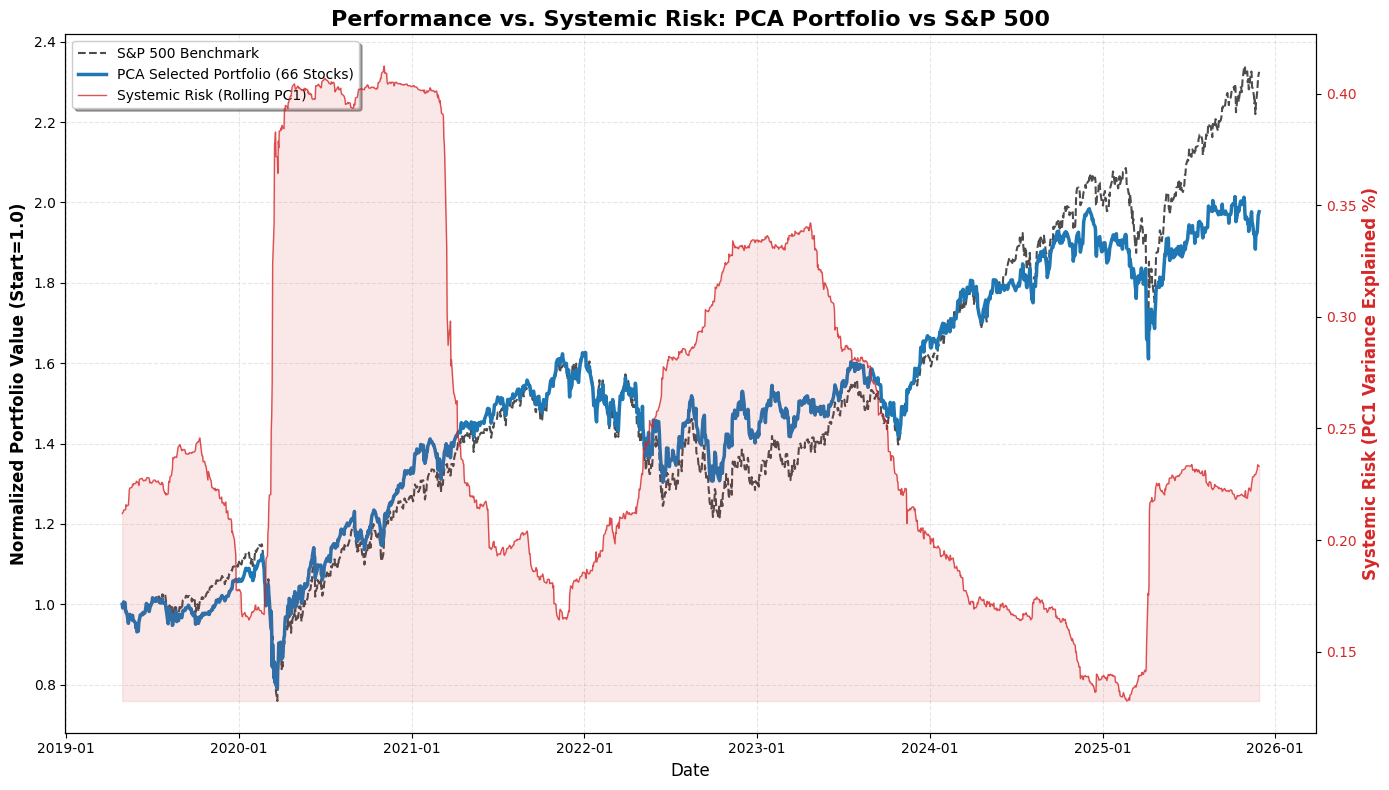

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ==========================================
# Phase 7: Composite Visualization (Risk vs. Return)
# ==========================================

print("正在下载 S&P 500 (^GSPC) 数据作为基准...")
# 1. 获取基准数据 (S&P 500)
sp500_data = yf.download('^GSPC', start=START_DATE, end=END_DATE,auto_adjust=False)['Adj Close']
# 2. 计算净值曲线 (Normalized Wealth Index)
# 假设初始资金为 1.0，计算累计收益
# -------------------------------------------------------

# A. 计算你那 66 只股票组合的净值 (每天等权重重仓)
# log_returns 是之前计算好的对数收益率矩阵
# 每日组合收益 = 所有股票收益的平均值 (Equal Weight)
portfolio_daily_ret = log_returns.mean(axis=1)
# 累计收益 (净值)
portfolio_nav = np.exp(portfolio_daily_ret.cumsum())
# 归一化：让起点对齐到 1.0 (从滚动窗口开始的那一天算起)
start_date = rolling_pc1.index[0]
portfolio_nav = portfolio_nav[start_date:]
portfolio_nav = portfolio_nav / portfolio_nav.iloc[0]

# B. 计算 S&P 500 的净值
sp500_ret = np.log(sp500_data / sp500_data.shift(1)).dropna()
sp500_nav = np.exp(sp500_ret.cumsum())
# 截取相同时间段并归一化
sp500_nav = sp500_nav[start_date:]
# 重新对齐索引（防止有些微小的日期差异）
sp500_nav = sp500_nav.reindex(portfolio_nav.index, method='ffill')
sp500_nav = sp500_nav / sp500_nav.iloc[0]

# ==========================================
# 3. 绘图 (Dual Axis Plotting)
# ==========================================

fig, ax1 = plt.subplots(figsize=(14, 8))

# --- 左轴 (Left Axis): 价格/净值 ---
color_port = '#1f77b4' # 蓝色
color_sp500 = 'black'  # 黑色

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Normalized Portfolio Value (Start=1.0)', fontsize=12, fontweight='bold')

# 画 S&P 500 (虚线，作为背景基准)
line1, = ax1.plot(sp500_nav.index, sp500_nav.values, color=color_sp500, linestyle='--', linewidth=1.5, alpha=0.7, label='S&P 500 Benchmark')
# 画 你的组合 (实线，加粗)
line2, = ax1.plot(portfolio_nav.index, portfolio_nav.values, color=color_port, linewidth=2.5, label='PCA Selected Portfolio (66 Stocks)')

ax1.tick_params(axis='y')
ax1.grid(True, which='major', linestyle='--', alpha=0.3)

# --- 右轴 (Right Axis): 系统性风险 (PC1 Ratio) ---
ax2 = ax1.twinx()  # 创建共享 x 轴的第二个 y 轴
color_risk = '#d62728' # 红色

ax2.set_ylabel('Systemic Risk (PC1 Variance Explained %)', fontsize=12, color=color_risk, fontweight='bold')
# 画 风险曲线 (填充颜色，强调危机时刻)
line3, = ax2.plot(rolling_pc1.index, rolling_pc1.values, color=color_risk, linewidth=1, alpha=0.8, label='Systemic Risk (Rolling PC1)')
ax2.fill_between(rolling_pc1.index, rolling_pc1.values, rolling_pc1.min(), color=color_risk, alpha=0.1)

ax2.tick_params(axis='y', labelcolor=color_risk)

# --- 图例与装饰 ---
lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10, frameon=True, shadow=True)

plt.title('Performance vs. Systemic Risk: PCA Portfolio vs S&P 500', fontsize=16, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# 标记关键点 (可选)
# 2022 熊市区间
if pd.Timestamp('2022-01-01') in portfolio_nav.index:
    # 在图上画一个框标注 2022
    import matplotlib.patches as patches
    start_2022 = mdates.date2num(pd.Timestamp('2022-01-01'))
    end_2022 = mdates.date2num(pd.Timestamp('2022-12-31'))
    rect = patches.Rectangle((start_2022, ax1.get_ylim()[0]), end_2022 - start_2022, ax1.get_ylim()[1] - ax1.get_ylim()[0],
                             linewidth=0, edgecolor='none', facecolor='gray', alpha=0.1)
    ax1.add_patch(rect)
    ax1.text(pd.Timestamp('2022-06-01'), ax1.get_ylim()[0] + 0.1, '2022 Defensive Alpha?',
             ha='center', fontsize=10, color='gray', fontweight='bold')

plt.tight_layout()
plt.show()

Optimizing weights for 66 stocks...
Optimization running (this may take a moment)...
Optimization Successful!
Min In-Sample TE: 4.97%


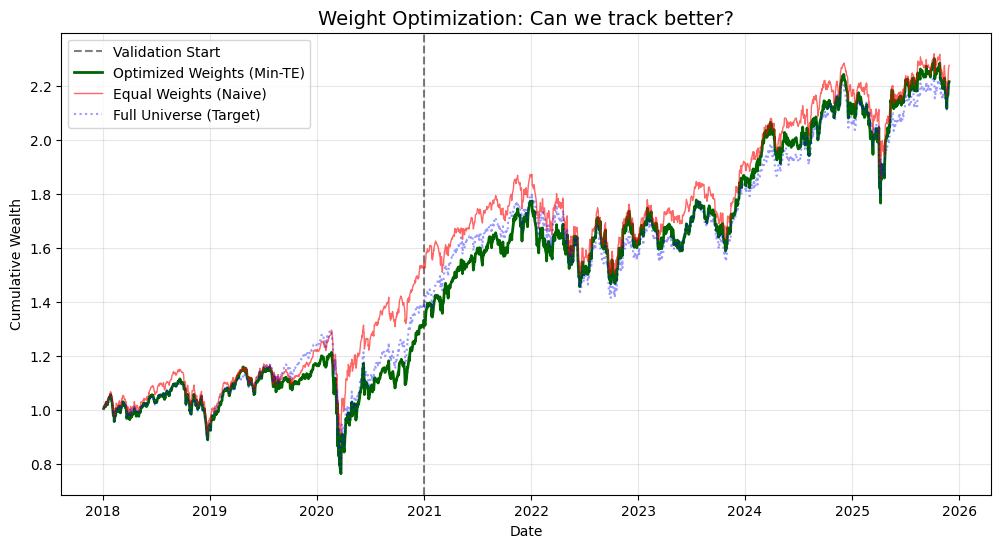


Out-of-Sample Validation (2021-2025):
Metric               | Naive (Equal W) | Optimized (Min-TE)
------------------------------------------------------------
Tracking Error       | 4.86%          | 4.91%  <-- Look at this!
Correlation          | 0.9555          | 0.9578


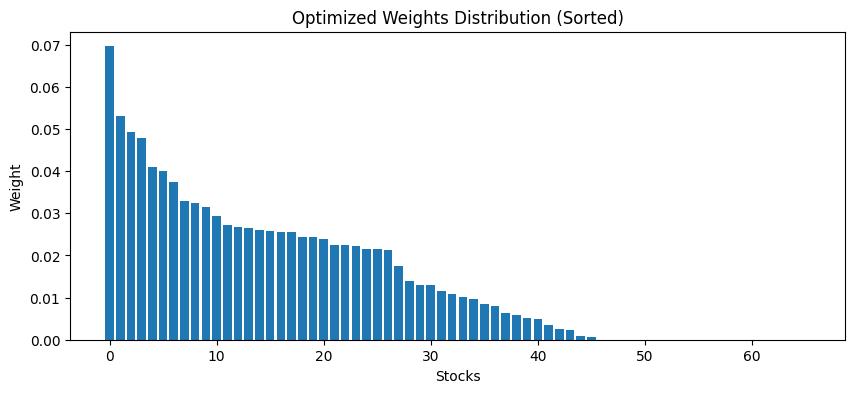

In [16]:
# ==========================================
# Phase 6: Minimum Tracking Error Optimization
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 1. 准备数据
# ------------------------------------------------
# 确保你有 selected_tickers (66只) 和 log_returns
if 'selected_tickers' not in locals():
    print("Error: Please run Phase 5 (Stock Selection) first to get 'selected_tickers'.")
else:
    print(f"Optimizing weights for {len(selected_tickers)} stocks...")

    # 定义训练期 (In-Sample)
    TRAIN_END = '2020-12-31'

    # 提取训练数据
    train_subset = log_returns.loc[:TRAIN_END, selected_tickers]

    # 定义基准 (Benchmark)：全市场等权组合
    # (这是为了验证 PCA 选出的子集能否代表全集)
    train_benchmark = log_returns.loc[:TRAIN_END].mean(axis=1)

    # 2. 定义优化函数
    # ------------------------------------------------
    def tracking_error_objective(weights, asset_returns, benchmark_returns):
        # 组合收益 = 资产收益矩阵 x 权重向量
        portfolio_returns = np.dot(asset_returns, weights)
        # 跟踪误差序列
        active_returns = portfolio_returns - benchmark_returns
        # 目标：最小化跟踪误差的波动率 (标准差)
        # 乘以 sqrt(252) 是为了年化，虽然对优化结果没影响，但方便看数值
        te = np.std(active_returns) * np.sqrt(252)
        return te

    # 3. 执行优化 (Scipy Minimize)
    # ------------------------------------------------
    n_assets = len(selected_tickers)

    # 初始猜测：等权重
    initial_weights = np.ones(n_assets) / n_assets

    # 约束条件：权重之和为 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # 边界条件：权重在 0 到 1 之间 (只做多)
    bounds = tuple((0, 1) for _ in range(n_assets))

    print("Optimization running (this may take a moment)...")
    result = minimize(
        fun=tracking_error_objective,
        x0=initial_weights,
        args=(train_subset.values, train_benchmark.values),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    if result.success:
        optimal_weights = result.x
        print("Optimization Successful!")
        print(f"Min In-Sample TE: {result.fun:.2%}")
    else:
        print("Optimization Failed. Using equal weights.")
        optimal_weights = initial_weights

    # 4. 回测验证 (In-Sample + Out-of-Sample)
    # ------------------------------------------------
    # 应用最优权重到全时段数据
    # Optimized Portfolio
    opt_ret = np.dot(log_returns[selected_tickers].values, optimal_weights)
    opt_ret = pd.Series(opt_ret, index=log_returns.index)

    # Previous Naive Portfolio (Equal Weight)
    naive_ret = log_returns[selected_tickers].mean(axis=1)

    # Benchmark (Full Universe)
    full_ret = log_returns.mean(axis=1)

    # 计算累计净值
    cum_opt = np.exp(opt_ret.cumsum())
    cum_naive = np.exp(naive_ret.cumsum())
    cum_full = np.exp(full_ret.cumsum())

    # 5. 可视化对比
    # ------------------------------------------------
    plt.figure(figsize=(12, 6))

    # 绘制分割线
    plt.axvline(x=pd.to_datetime(TRAIN_END), color='black', linestyle='--', alpha=0.5, label='Validation Start')

    plt.plot(cum_opt, label='Optimized Weights (Min-TE)', color='darkgreen', linewidth=2)
    plt.plot(cum_naive, label='Equal Weights (Naive)', color='red', alpha=0.6, linewidth=1)
    plt.plot(cum_full, label='Full Universe (Target)', color='blue', alpha=0.4, linestyle=':')

    plt.title(f'Weight Optimization: Can we track better?', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Wealth')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.savefig('optimization_result.png', dpi=300)
    plt.show()

    # 6. 计算样本外指标 (Out-of-Sample Metrics)
    # ------------------------------------------------
    # 只看 2021-01-01 之后的数据
    oos_opt = opt_ret.loc[TRAIN_END:]
    oos_bench = full_ret.loc[TRAIN_END:]
    oos_naive = naive_ret.loc[TRAIN_END:]

    def get_te_corr(r_p, r_b):
        diff = r_p - r_b
        te = diff.std() * np.sqrt(252)
        corr = r_p.corr(r_b)
        return te, corr

    te_opt, corr_opt = get_te_corr(oos_opt, oos_bench)
    te_naive, corr_naive = get_te_corr(oos_naive, oos_bench)

    print("\nOut-of-Sample Validation (2021-2025):")
    print(f"{'Metric':<20} | {'Naive (Equal W)':<15} | {'Optimized (Min-TE)':<15}")
    print("-" * 60)
    print(f"{'Tracking Error':<20} | {te_naive:.2%}          | {te_opt:.2%}  <-- Look at this!")
    print(f"{'Correlation':<20} | {corr_naive:.4f}          | {corr_opt:.4f}")

    # 7. 查看权重分布 (可选)
    # 看看是不是过度集中在某几只股票上了
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(optimal_weights)), np.sort(optimal_weights)[::-1])
    plt.title('Optimized Weights Distribution (Sorted)')
    plt.xlabel('Stocks')
    plt.ylabel('Weight')
    plt.show()

Starting Jolliffe Stock Selection (Conservative Mode)...
Training Period: Start - 2020-12-31
New Threshold (Eigenvalue): 0.2
Iter 5: Removed 17 stocks. Remaining: 135. Min Eig: 0.1169
Iter 10: Removed 1 stocks. Remaining: 109. Min Eig: 0.1866

Selection Converged!
Minimum Eigenvalue (0.2011) > Threshold (0.2)
------------------------------
Final Selection: 108 stocks
Reduction Rate: 77.4%
------------------------------


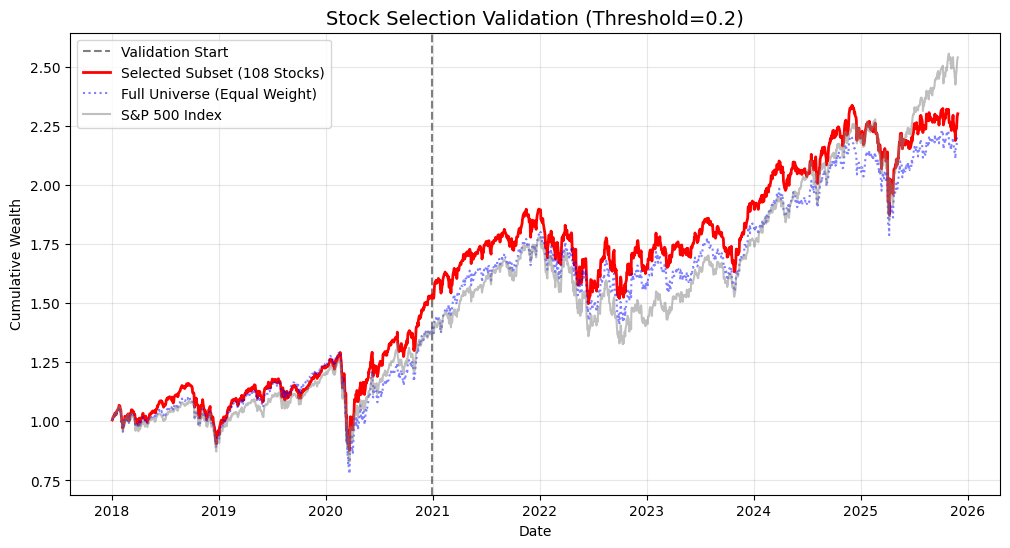


Validation Metrics (Subset vs Full 1/N):
Correlation: 0.9720
Tracking Error (Ann.): 4.86%


In [ ]:
# ==========================================
# Phase 5 (Retry): Jolliffe Stock Selection (Conservative Mode)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 调整筛选参数
# ------------------------------------------------
TRAIN_END_DATE = '2020-12-31'
# 修改点：将阈值从 0.7 提高到 0.95
# 这意味着我们只删除那些包含极少信息量（<0.95）的维度
# 结果应该会保留更多股票（预计 30-50 只）
THRESHOLD = 0.20

print(f"Starting Jolliffe Stock Selection (Conservative Mode)...")
print(f"Training Period: Start - {TRAIN_END_DATE}")
print(f"New Threshold (Eigenvalue): {THRESHOLD}")

# 准备训练数据
# 确保使用之前步骤生成的 log_returns 数据
if 'log_returns' not in locals():
    # 如果数据丢失，尝试读取本地文件 (视你之前的保存路径而定)
    # log_returns = pd.read_pickle('./Data/sp500_log_returns.pkl')
    # market_returns = pd.read_pickle('./Data/sp500_market_returns.pkl')
    print("Error: log_returns data not found in memory. Please reload data first.")
else:
    train_data = log_returns.loc[:TRAIN_END_DATE].dropna(axis=1)
    current_stocks = list(train_data.columns)

    # 2. 迭代删除循环
    # ------------------------------------------------
    iteration = 0
    while True:
        # A. 准备数据
        df_iter = train_data[current_stocks]

        # B. 标准化
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_iter)

        # C. PCA 分解
        pca = PCA()
        pca.fit(scaled_data)

        eig_vals = pca.explained_variance_
        min_eig = min(eig_vals)

        # D. 检查停止条件
        if min_eig > THRESHOLD:
            print(f"\nSelection Converged!")
            print(f"Minimum Eigenvalue ({min_eig:.4f}) > Threshold ({THRESHOLD})")
            break

        # E. 删除逻辑
        # 找到所有特征值 < Threshold 的成分
        small_eig_indices = np.where(eig_vals < THRESHOLD)[0]

        stocks_to_drop = set()
        loadings = pca.components_

        for idx in small_eig_indices:
            component_loadings = loadings[idx]
            stock_idx = np.argmax(np.abs(component_loadings))
            stocks_to_drop.add(current_stocks[stock_idx])

        if not stocks_to_drop:
            break

        current_stocks = [s for s in current_stocks if s not in stocks_to_drop]

        iteration += 1
        if iteration % 5 == 0:
            print(f"Iter {iteration}: Removed {len(stocks_to_drop)} stocks. Remaining: {len(current_stocks)}. Min Eig: {min_eig:.4f}")

    # 3. 结果摘要
    # ------------------------------------------------
    selected_tickers = current_stocks
    print("-" * 30)
    print(f"Final Selection: {len(selected_tickers)} stocks")
    print(f"Reduction Rate: {1 - len(selected_tickers)/train_data.shape[1]:.1%}")
    print("-" * 30)

    # 4. 验证与回测
    # ------------------------------------------------
    # 构建组合收益率
    subset_ret = log_returns[selected_tickers].mean(axis=1)
    full_ret = log_returns.mean(axis=1)
    mkt_ret = market_returns

    # 计算累计净值
    cum_subset = np.exp(subset_ret.cumsum())
    cum_full = np.exp(full_ret.cumsum())
    cum_mkt = np.exp(mkt_ret.loc[subset_ret.index].cumsum())

    # 5. 可视化
    plt.figure(figsize=(12, 6))

    # 绘制分割线
    valid_start_date = pd.to_datetime(TRAIN_END_DATE)
    plt.axvline(x=valid_start_date, color='black', linestyle='--', alpha=0.5, label='Validation Start')

    # 绘制曲线
    plt.plot(cum_subset, label=f'Selected Subset ({len(selected_tickers)} Stocks)', color='red', linewidth=2)
    plt.plot(cum_full, label='Full Universe (Equal Weight)', color='blue', alpha=0.5, linestyle=':')
    plt.plot(cum_mkt, label='S&P 500 Index', color='grey', alpha=0.5)

    plt.title(f'Stock Selection Validation (Threshold={THRESHOLD})', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Wealth')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.savefig('stock_selection_retry.png', dpi=300)
    plt.show()

    # 6. 计算指标
    # 针对全市场等权组合 (Full Universe) 的跟踪误差
    # 因为我们的选股组合是等权的，所以它的 benchmark 应该是全市场等权，而不是市值加权的 S&P 500
    tracking_diff = subset_ret - full_ret
    te = tracking_diff.std() * np.sqrt(252)
    corr = subset_ret.corr(full_ret)

    print(f"\nValidation Metrics (Subset vs Full 1/N):")
    print(f"Correlation: {corr:.4f}")
    print(f"Tracking Error (Ann.): {te:.2%}")

Starting Jolliffe Stock Selection (Conservative Mode)...
Training Period: Start - 2020-12-31
New Threshold (Eigenvalue): 0.1
Iter 5: Removed 16 stocks. Remaining: 221. Min Eig: 0.0675
Iter 10: Removed 1 stocks. Remaining: 200. Min Eig: 0.0937

Selection Converged!
Minimum Eigenvalue (0.1004) > Threshold (0.1)
------------------------------
Final Selection: 199 stocks
Reduction Rate: 58.3%
------------------------------


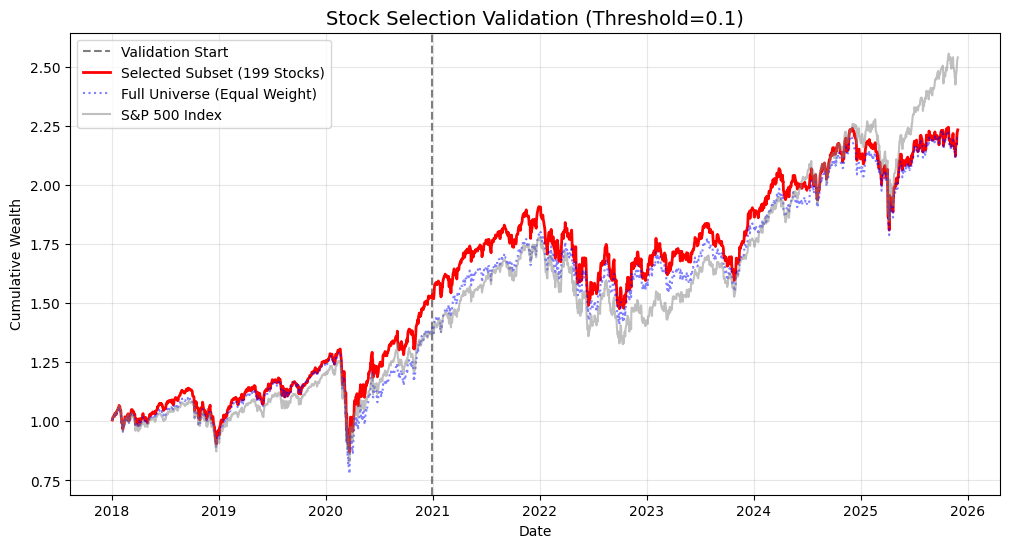


Validation Metrics (Subset vs Full 1/N):
Correlation: 0.9836
Tracking Error (Ann.): 3.75%


In [ ]:
# ==========================================
# Phase 5 (Retry): Jolliffe Stock Selection (Conservative Mode)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 调整筛选参数
# ------------------------------------------------
TRAIN_END_DATE = '2020-12-31'
# 修改点：将阈值从 0.7 提高到 0.95
# 这意味着我们只删除那些包含极少信息量（<0.95）的维度
# 结果应该会保留更多股票（预计 30-50 只）
THRESHOLD = 0.10

print(f"Starting Jolliffe Stock Selection (Conservative Mode)...")
print(f"Training Period: Start - {TRAIN_END_DATE}")
print(f"New Threshold (Eigenvalue): {THRESHOLD}")

# 准备训练数据
# 确保使用之前步骤生成的 log_returns 数据
if 'log_returns' not in locals():
    # 如果数据丢失，尝试读取本地文件 (视你之前的保存路径而定)
    # log_returns = pd.read_pickle('./Data/sp500_log_returns.pkl')
    # market_returns = pd.read_pickle('./Data/sp500_market_returns.pkl')
    print("Error: log_returns data not found in memory. Please reload data first.")
else:
    train_data = log_returns.loc[:TRAIN_END_DATE].dropna(axis=1)
    current_stocks = list(train_data.columns)

    # 2. 迭代删除循环
    # ------------------------------------------------
    iteration = 0
    while True:
        # A. 准备数据
        df_iter = train_data[current_stocks]

        # B. 标准化
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_iter)

        # C. PCA 分解
        pca = PCA()
        pca.fit(scaled_data)

        eig_vals = pca.explained_variance_
        min_eig = min(eig_vals)

        # D. 检查停止条件
        if min_eig > THRESHOLD:
            print(f"\nSelection Converged!")
            print(f"Minimum Eigenvalue ({min_eig:.4f}) > Threshold ({THRESHOLD})")
            break

        # E. 删除逻辑
        # 找到所有特征值 < Threshold 的成分
        small_eig_indices = np.where(eig_vals < THRESHOLD)[0]

        stocks_to_drop = set()
        loadings = pca.components_

        for idx in small_eig_indices:
            component_loadings = loadings[idx]
            stock_idx = np.argmax(np.abs(component_loadings))
            stocks_to_drop.add(current_stocks[stock_idx])

        if not stocks_to_drop:
            break

        current_stocks = [s for s in current_stocks if s not in stocks_to_drop]

        iteration += 1
        if iteration % 5 == 0:
            print(f"Iter {iteration}: Removed {len(stocks_to_drop)} stocks. Remaining: {len(current_stocks)}. Min Eig: {min_eig:.4f}")

    # 3. 结果摘要
    # ------------------------------------------------
    selected_tickers = current_stocks
    print("-" * 30)
    print(f"Final Selection: {len(selected_tickers)} stocks")
    print(f"Reduction Rate: {1 - len(selected_tickers)/train_data.shape[1]:.1%}")
    print("-" * 30)

    # 4. 验证与回测
    # ------------------------------------------------
    # 构建组合收益率
    subset_ret = log_returns[selected_tickers].mean(axis=1)
    full_ret = log_returns.mean(axis=1)
    mkt_ret = market_returns

    # 计算累计净值
    cum_subset = np.exp(subset_ret.cumsum())
    cum_full = np.exp(full_ret.cumsum())
    cum_mkt = np.exp(mkt_ret.loc[subset_ret.index].cumsum())

    # 5. 可视化
    plt.figure(figsize=(12, 6))

    # 绘制分割线
    valid_start_date = pd.to_datetime(TRAIN_END_DATE)
    plt.axvline(x=valid_start_date, color='black', linestyle='--', alpha=0.5, label='Validation Start')

    # 绘制曲线
    plt.plot(cum_subset, label=f'Selected Subset ({len(selected_tickers)} Stocks)', color='red', linewidth=2)
    plt.plot(cum_full, label='Full Universe (Equal Weight)', color='blue', alpha=0.5, linestyle=':')
    plt.plot(cum_mkt, label='S&P 500 Index', color='grey', alpha=0.5)

    plt.title(f'Stock Selection Validation (Threshold={THRESHOLD})', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Wealth')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.savefig('stock_selection_retry.png', dpi=300)
    plt.show()

    # 6. 计算指标
    # 针对全市场等权组合 (Full Universe) 的跟踪误差
    # 因为我们的选股组合是等权的，所以它的 benchmark 应该是全市场等权，而不是市值加权的 S&P 500
    tracking_diff = subset_ret - full_ret
    te = tracking_diff.std() * np.sqrt(252)
    corr = subset_ret.corr(full_ret)

    print(f"\nValidation Metrics (Subset vs Full 1/N):")
    print(f"Correlation: {corr:.4f}")
    print(f"Tracking Error (Ann.): {te:.2%}")

## **Report Part**